<a href="https://colab.research.google.com/github/VamK2/Data-Science-Machine-Learning/blob/main/VamsiK2_Project_Plant_Seedlings_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Computer Vision: Plant Seedlings Classification

## Problem Statement

### Context

In recent times, the field of agriculture has been in urgent need of modernizing, since the amount of manual work people need to put in to check if plants are growing correctly is still highly extensive. Despite several advances in agricultural technology, people working in the agricultural industry still need to have the ability to sort and recognize different plants and weeds, which takes a lot of time and effort in the long term. The potential is ripe for this trillion-dollar industry to be greatly impacted by technological innovations that cut down on the requirement for manual labor, and this is where Artificial Intelligence can actually benefit the workers in this field, as **the time and energy required to identify plant seedlings will be greatly shortened by the use of AI and Deep Learning.** The ability to do so far more efficiently and even more effectively than experienced manual labor, could lead to better crop yields, the freeing up of human inolvement for higher-order agricultural decision making, and in the long term will result in more sustainable environmental practices in agriculture as well.


### Objective

The aim of this project is to Build a Convolutional Neural Netowrk to classify plant seedlings into their respective categories.

### Data Dictionary

The Aarhus University Signal Processing group, in collaboration with the University of Southern Denmark, has recently released a dataset containing **images of unique plants belonging to 12 different species.**

- The dataset can be download from Olympus.
- The data file names are:
    - images.npy
    - Labels.csv
- Due to the large volume of data, the images were converted to the images.npy file and the labels are also put into Labels.csv, so that you can work on the data/project seamlessly without having to worry about the high data volume.

- The goal of the project is to create a classifier capable of determining a plant's species from an image.

**List of Species**

- Black-grass
- Charlock
- Cleavers
- Common Chickweed
- Common Wheat
- Fat Hen
- Loose Silky-bent
- Maize
- Scentless Mayweed
- Shepherds Purse
- Small-flowered Cranesbill
- Sugar beet

### **Note: Please use GPU runtime on Google Colab to execute the code faster.**

## **Please read the instructions carefully before starting the project.**

This is a commented Python Notebook file in which all the instructions and tasks to be performed are mentioned.

* Identify the task to be performed correctly and only then proceed to
 the required code

* Add Comments to all code sections and important codes with explanations

* Running incomplete code may throw an error

* Please run the codes in a sequential manner from the beginning to avoid any unnecessary errors

* Add the results/observations derived from the analysis in the presentation and submit the same in .pdf format

In [ ]:
!pip install flask-ngrok==0.0.25

## Importing necessary libraries

In [ ]:
# Installing the libraries with the specified version.
#uncomment and run the following line if Google Colab is being used
!pip install tensorflow==2.15.0 scikit-learn==1.2.2 seaborn==0.13.1 matplotlib==3.7.1 numpy==1.25.2 pandas==1.5.3 opencv-python==4.8.0.76 -q --user

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# Installing the libraries with the specified version.
# uncomment and run the following lines if Jupyter Notebook is being used
#!pip install tensorflow==2.13.0 scikit-learn==1.2.2 seaborn==0.11.1 matplotlib==3.3.4 numpy==1.24.3 pandas==1.5.2 opencv-python==4.8.0.76 -q --user

**Note**: *After running the above cell, kindly restart the notebook kernel and run all cells sequentially from the start again.*

In [ ]:
import os
import numpy as np                                                                               # Importing numpy for Matrix Operations
import pandas as pd                                                                              # Importing pandas to read CSV files
import matplotlib.pyplot as plt                                                                  # Importting matplotlib for Plotting and visualizing images
import math                                                                                      # Importing math module to perform mathematical operations
import cv2                                                                                       # Importing openCV for image processing
import seaborn as sns                                                                            # Importing seaborn to plot graphs


# Tensorflow modules
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator                              # Importing the ImageDataGenerator for data augmentation
from tensorflow.keras.models import Sequential                                                   # Importing the sequential module to define a sequential model
from tensorflow.keras.layers import Dense,Dropout,Flatten,Conv2D,MaxPooling2D,BatchNormalization # Defining all the layers to build our CNN Model
from tensorflow.keras.optimizers import Adam,SGD                                                 # Importing the optimizers which can be used in our model
from sklearn import preprocessing                                                                # Importing the preprocessing module to preprocess the data
from sklearn.model_selection import train_test_split                                             # Importing train_test_split function to split the data into train and test
from sklearn.metrics import confusion_matrix                                                     # Importing confusion_matrix to plot the confusion matrix
from sklearn.preprocessing import LabelBinarizer
# Display images using OpenCV
from google.colab.patches import cv2_imshow                                                      # Importing cv2_imshow from google.patches to display images
from sklearn.model_selection import train_test_split
from tensorflow.keras import backend
from keras.callbacks import ReduceLROnPlateau
import random
# Ignore warnings
import warnings
warnings.filterwarnings('ignore')

In [ ]:
from IPython.display import HTML, display

def set_css():
    display(HTML('''
    <style>
    pre {
        white-space: pre-wrap;
    }
    </style>
    '''))

get_ipython().events.register('pre_run_cell', set_css)


## Loading the dataset

In [ ]:
# Load the image file of dataset
images = np.load('/content/drive/Deep Neural Networks/Deep Learning/Computer Vision/Project - Plant Seedlings Classification using CNN/PlantSeedlngDataSet/images.npy')
# Load the labels file of dataset

labels = pd.read_csv('/content/drive/Deep Neural Networks/Deep Learning/Computer Vision/Project - Plant Seedlings Classification using CNN/PlantSeedlngDataSet/Labels.csv')  # Code to read the dataset

## Data Overview

### Understand the shape of the dataset

In [ ]:
print(images.shape)         # Code to check the shape
print(labels.shape)         # Code to check the shape

(4750, 128, 128, 3)
(4750, 1)


## Exploratory Data Analysis

### Plotting random images from each of the class

In [ ]:
def plot_images(images,labels):
  num_classes=10                                                                  # Number of Classes
  categories=np.unique(labels)
  keys=dict(labels['Label'])                                                      # Obtaing the unique classes from y_train
  rows = 3                                                                        # Defining number of rows=3
  cols = 4                                                                        # Defining number of columns=4
  fig = plt.figure(figsize=(10, 8))                                               # Defining the figure size to 10x8
  for i in range(cols):
      for j in range(rows):
          random_index = np.random.randint(0, len(labels))                        # Generating random indices from the data and plotting the images
          ax = fig.add_subplot(rows, cols, i * rows + j + 1)                      # Adding subplots with 3 rows and 4 columns
          ax.imshow(images[random_index, :])                                      # Plotting the image
          ax.set_title(keys[random_index])
  plt.show()

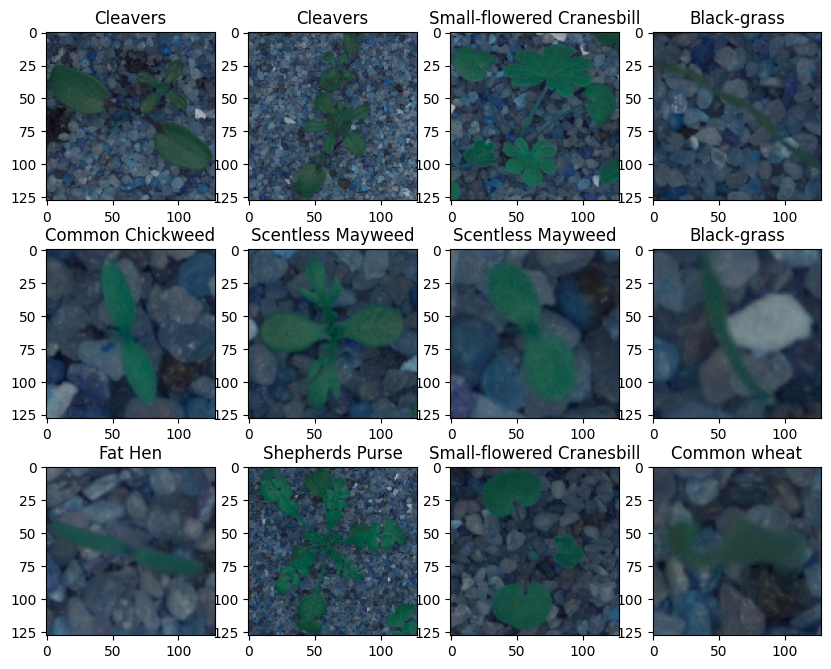

In [ ]:
plot_images(images,labels)   # Code to input the images and labels to the function and plot the images with their labels

### Checking the distribution of the target variable

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11],
 [Text(0, 0, 'Small-flowered Cranesbill'),
  Text(1, 0, 'Fat Hen'),
  Text(2, 0, 'Shepherds Purse'),
  Text(3, 0, 'Common wheat'),
  Text(4, 0, 'Common Chickweed'),
  Text(5, 0, 'Charlock'),
  Text(6, 0, 'Cleavers'),
  Text(7, 0, 'Scentless Mayweed'),
  Text(8, 0, 'Sugar beet'),
  Text(9, 0, 'Maize'),
  Text(10, 0, 'Black-grass'),
  Text(11, 0, 'Loose Silky-bent')])

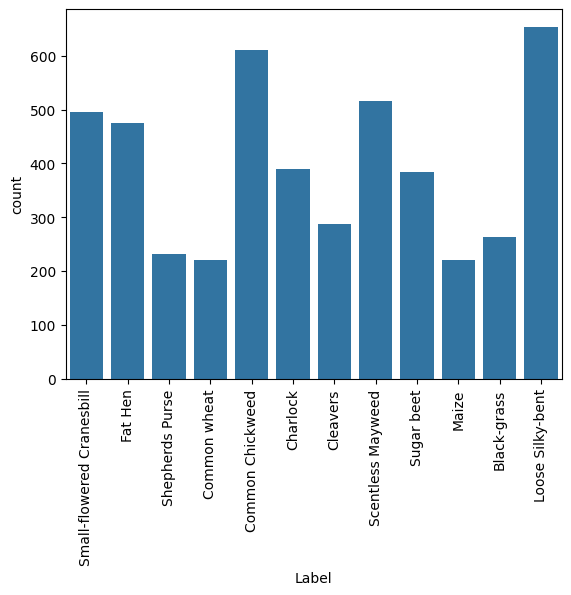

In [ ]:
sns.countplot(x=labels['Label'])            # Code to check for data imbalance
plt.xticks(rotation='vertical')

## Data Pre-Processing

### Converting the BGR images to RGB images.

In [ ]:
# Converting the images from BGR to RGB using cvtColor function of OpenCV
for i in range(len(images)):
  images[i] = cv2.cvtColor(images[i], cv2.COLOR_BGR2RGB)        # Code to convert the images from BGR to RGB

### Resizing images

As the size of the images is large, it may be computationally expensive to train on these larger images; therefore, it is preferable to reduce the image size from 128 to 64.

In [ ]:
images_decreased=[]
height = 64                    # Code to define the height as 64
width = 64                    # Code to define the width as 64
dimensions = (width, height)
for i in range(len(images)):
  images_decreased.append( cv2.resize(images[i], dimensions, interpolation=cv2.INTER_LINEAR))

**Image before resizing**

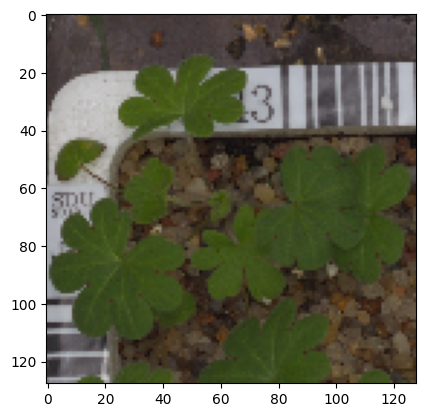

In [ ]:
plt.imshow(images[3])

**Image after resizing**

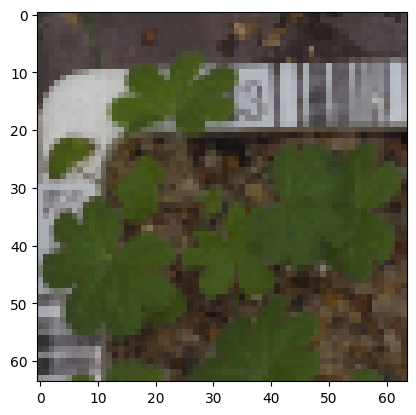

In [ ]:
plt.imshow(images_decreased[3])

### Data Preparation for Modeling


- As we have less images in our dataset, we will only use 10% of our data for testing, 10% of our data for validation and 80% of our data for training.
- We are using the train_test_split() function from scikit-learn. Here, we split the dataset into three parts, train,test and validation.

In [ ]:
X_temp, X_test, y_temp, y_test = train_test_split(np.array(images_decreased),labels , test_size=0.1, random_state=42,stratify=labels)   # Code to split the data with test_size as 0.1
X_train, X_val, y_train, y_val = train_test_split(X_temp, y_temp, test_size=0.1, random_state=42,stratify=y_temp)                       # Code to split the data with test_size as 0.1

In [ ]:
# Code to check the shape of train, validation and test data
print(X_train.shape, y_train.shape)
print(X_val.shape, y_val.shape)
print(X_test.shape, y_test.shape)

(3847, 64, 64, 3) (3847, 1)
(428, 64, 64, 3) (428, 1)
(475, 64, 64, 3) (475, 1)


### Encoding the target labels

In [ ]:
# Convert labels from names to one hot vectors.
# We have already used encoding methods like onehotencoder and labelencoder earlier so now we will be using a new encoding method called labelBinarizer.
# Labelbinarizer works similar to onehotencoder

enc = LabelBinarizer()                                        # Code to intialize the labelBinarizer
y_train_encoded = enc.fit_transform(y_train)        # Code to fit and transform y_train
y_val_encoded=enc.transform(y_val)                  # Code to transform y_val
y_test_encoded=enc.transform(y_test)                # Code to transform y_test

In [ ]:
y_train_encoded.shape, y_val_encoded.shape, y_test_encoded.shape    # Code to check the shape of train, validation and test data

((3847, 12), (428, 12), (475, 12))

### Data Normalization

Since the **image pixel values range from 0-255**, our method of normalization here will be **scaling** - we shall **divide all the pixel values by 255 to standardize the images to have values between 0-1.**

In [ ]:
# Code to normalize the image pixels of train, test and validation data
# Normalize the image pixels of train, test and validation data
X_train_normalized = X_train.astype('float32') / 255.0
X_val_normalized = X_val.astype('float32') / 255.0
X_test_normalized = X_test.astype('float32') / 255.0

## Model Building

In [ ]:
# Clearing backend
backend.clear_session()

In [ ]:
# Fixing the seed for random number generators
np.random.seed(42)
random.seed(42)
tf.random.set_seed(42)

In [ ]:
# Intializing a sequential model
model1 = Sequential()                             # Code to intialize a sequential model

# Code to add the first conv layer with 128 filters and kernel size 3x3 , padding 'same' provides the output size same as the input size
# Input_shape denotes input image dimension of images
model1.add(Conv2D(128, (3, 3), activation='relu', padding="same", input_shape=(64, 64, 3)))

# Code to add the max pooling to reduce the size of output of first conv layer
model1.add(MaxPooling2D((2, 2), padding = 'same'))

# Code to create two similar convolution and max-pooling layers activation = relu
model1.add(Conv2D(64, (3, 3), activation='relu', padding="same"))
model1.add(MaxPooling2D((2, 2), padding = 'same'))

model1.add(Conv2D(32, (3, 3), activation='relu', padding="same"))
model1.add(MaxPooling2D((2, 2), padding = 'same'))

# Code to flatten the output of the conv layer after max pooling to make it ready for creating dense connections
model1.add(Flatten())

# Code to add a fully connected dense layer with 16 neurons
model1.add(Dense(16, activation='relu'))
model1.add(Dropout(0.3))
# Code to add the output layer with 12 neurons and activation functions as softmax since this is a multi-class classification problem
model1.add(Dense(12, activation='softmax'))

# Code to use the Adam Optimizer
opt=Adam()
# Code to Compile the model using suitable metric for loss fucntion
model1.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])

# Code to generate the summary of the model
model1.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 64, 64, 128)       3584      
                                                                 
 max_pooling2d (MaxPooling2  (None, 32, 32, 128)       0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 32, 32, 64)        73792     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 16, 16, 64)        0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 16, 16, 32)        18464     
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 8, 8, 32)          0

<b> Fitting the model on the train data

In [ ]:
# Code to fit the model on train and also using the validation data for validation
history_1 = model1.fit(
            X_train_normalized, y_train_encoded,
            epochs=30,
            validation_data=(X_val_normalized,y_val_encoded),
            batch_size=32,
            verbose=2
)

Epoch 1/30
121/121 - 9s - loss: 2.4509 - accuracy: 0.1183 - val_loss: 2.4248 - val_accuracy: 0.1402 - 9s/epoch - 71ms/step
Epoch 2/30
121/121 - 1s - loss: 2.2465 - accuracy: 0.2555 - val_loss: 1.9376 - val_accuracy: 0.3621 - 1s/epoch - 10ms/step
Epoch 3/30
121/121 - 1s - loss: 1.9742 - accuracy: 0.3236 - val_loss: 1.7330 - val_accuracy: 0.4065 - 1s/epoch - 9ms/step
Epoch 4/30
121/121 - 1s - loss: 1.8277 - accuracy: 0.3702 - val_loss: 1.6375 - val_accuracy: 0.4346 - 1s/epoch - 9ms/step
Epoch 5/30
121/121 - 1s - loss: 1.6903 - accuracy: 0.4006 - val_loss: 1.6472 - val_accuracy: 0.4439 - 1s/epoch - 9ms/step
Epoch 6/30
121/121 - 1s - loss: 1.5836 - accuracy: 0.4357 - val_loss: 1.3471 - val_accuracy: 0.5234 - 1s/epoch - 11ms/step
Epoch 7/30
121/121 - 1s - loss: 1.5378 - accuracy: 0.4435 - val_loss: 1.3214 - val_accuracy: 0.5327 - 1s/epoch - 11ms/step
Epoch 8/30
121/121 - 1s - loss: 1.4785 - accuracy: 0.4549 - val_loss: 1.2318 - val_accuracy: 0.5678 - 1s/epoch - 11ms/step
Epoch 9/30
121/121 

**Model Evaluation**

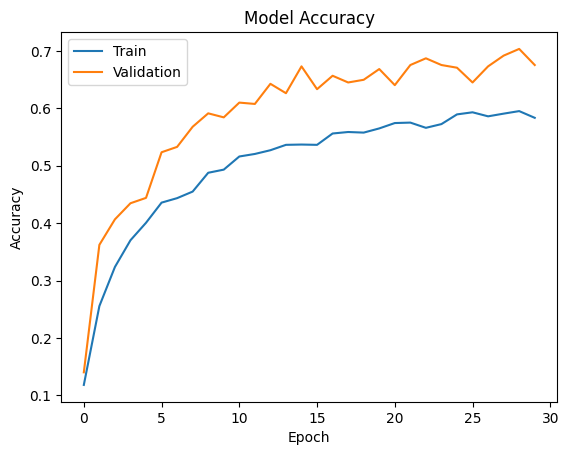

In [ ]:
plt.plot(history_1.history['accuracy'])
plt.plot(history_1.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

**Evaluate the model on test data**

In [ ]:
accuracy = model1.evaluate(X_test_normalized, y_test_encoded, verbose=2)    # Code to evaluate the model on test data

15/15 - 0s - loss: 1.0112 - accuracy: 0.6926 - 299ms/epoch - 20ms/step


**Plotting the Confusion Matrix**

In [ ]:
# Here we would get the output as probablities for each category
y_pred=model1.predict(X_test_normalized)                          # Code to predict the output probabilities

15/15 [==============================] - 0s 4ms/step


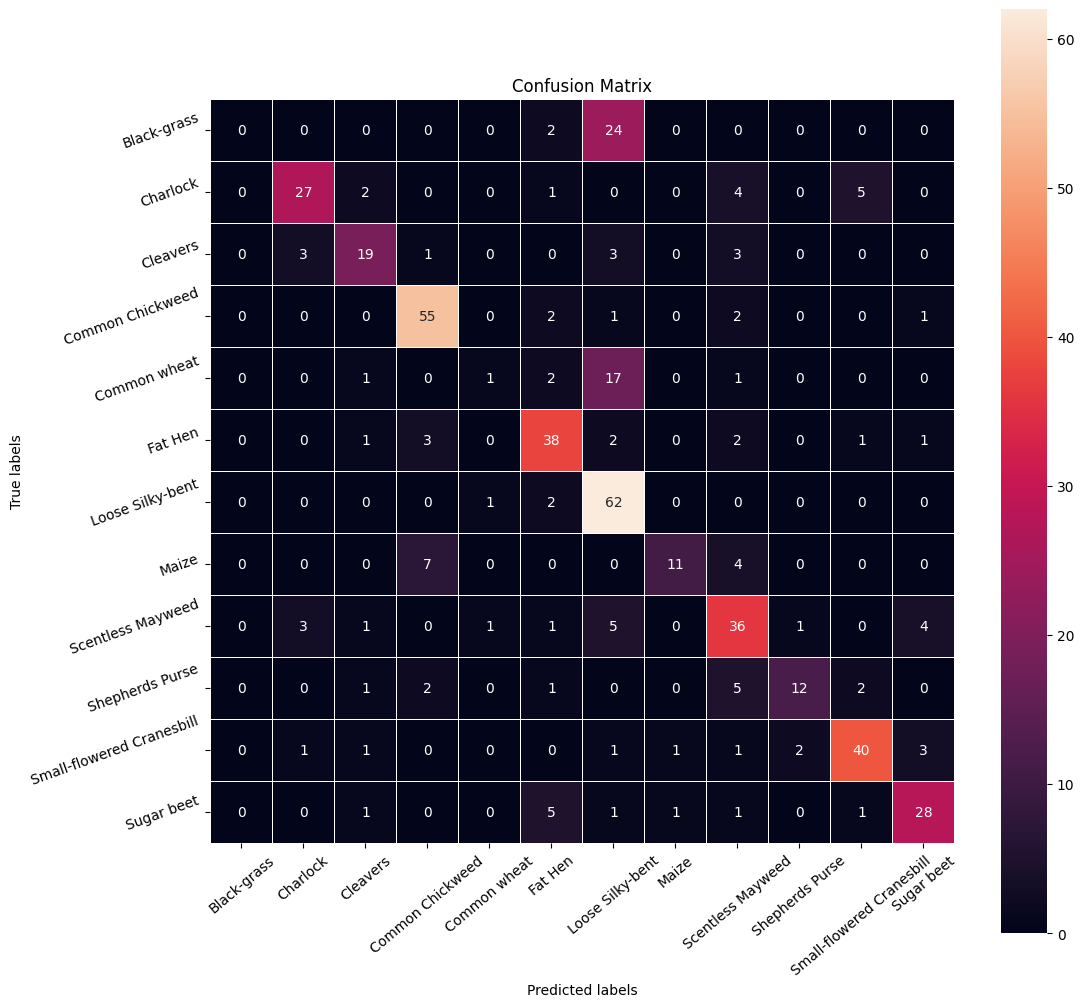

In [ ]:
# Obtaining the categorical values from y_test_encoded and y_pred
y_pred_arg=np.argmax(y_pred,axis=1)
y_test_arg=np.argmax(y_test_encoded,axis=1)

# Plotting the Confusion Matrix using confusion matrix() function which is also predefined in tensorflow module
confusion_matrix = tf.math.confusion_matrix(y_test_arg, y_pred_arg)              # Code to plot the confusion matrix
f, ax = plt.subplots(figsize=(12, 12))
sns.heatmap(
    confusion_matrix,
    annot=True,
    linewidths=.4,
    fmt="d",
    square=True,
    ax=ax
)
# Setting the labels to both the axes
ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels');
ax.set_title('Confusion Matrix');
ax.xaxis.set_ticklabels(list(enc.classes_),rotation=40)
ax.yaxis.set_ticklabels(list(enc.classes_),rotation=20)
plt.show()

**Plotting Classification Report**

In [ ]:
from sklearn import metrics
# Plotting the classification report
cr = metrics.classification_report(y_test_arg, y_pred_arg)     # Code to plot the classification report
print(cr)

              precision    recall  f1-score   support

           0       0.00      0.00      0.00        26
           1       0.79      0.69      0.74        39
           2       0.70      0.66      0.68        29
           3       0.81      0.90      0.85        61
           4       0.33      0.05      0.08        22
           5       0.70      0.79      0.75        48
           6       0.53      0.95      0.69        65
           7       0.85      0.50      0.63        22
           8       0.61      0.69      0.65        52
           9       0.80      0.52      0.63        23
          10       0.82      0.80      0.81        50
          11       0.76      0.74      0.75        38

    accuracy                           0.69       475
   macro avg       0.64      0.61      0.60       475
weighted avg       0.66      0.69      0.66       475



## Model Performance Improvement

**Reducing the Learning Rate:**

**ReduceLRonPlateau()** is a function that will be used to decrease the learning rate by some factor, if the loss is not decreasing for some time. This may start decreasing the loss at a smaller learning rate. There is a possibility that the loss may still not decrease. This may lead to executing the learning rate reduction again in an attempt to achieve a lower loss.

In [ ]:
# Code to monitor val_accuracy
learning_rate_reduction = ReduceLROnPlateau(monitor='val_accuracy',
                                            patience=3,
                                            verbose=1,
                                            factor=0.5,
                                            min_lr=0.00001)


### **Data Augmentation**

In [ ]:
# Clearing backend
from tensorflow.keras import backend
backend.clear_session()

# Fixing the seed for random number generators
import random
np.random.seed(42)
random.seed(42)
tf.random.set_seed(42)

In [ ]:
# Code to set the rotation_range to 20
train_datagen = ImageDataGenerator(
                              rotation_range=20,
                              fill_mode='nearest'
                              )

In [ ]:
from tensorflow.keras.layers import MaxPool2D # Intializing a sequential model
model2 = Sequential()

# Code to add the first conv layer with 64 filters and kernel size 3x3 , padding 'same' provides the output size same as the input size
# Input_shape denotes input image dimension images
model2.add(Conv2D(64, (3, 3), activation='relu', padding="same", input_shape=(64, 64, 3)))

# Code to add max pooling to reduce the size of output of first conv layer
model2.add(MaxPool2D((2, 2), padding = 'same'))


model2.add(Conv2D(32, (3, 3), activation='relu', padding="same"))
model2.add(MaxPooling2D((2, 2), padding = 'same'))
model2.add(BatchNormalization())

# flattening the output of the conv layer after max pooling to make it ready for creating dense connections
model2.add(Flatten())

# Adding a fully connected dense layer with 16 neurons
model2.add(Dense(16, activation='relu'))

# Code to add dropout with dropout_rate=0.3
model2.add(Dropout(0.3))
# Code to add the output layer with 12 neurons and activation functions as softmax since this is a multi-class classification problem
model2.add(Dense(12, activation='softmax'))

# Code to initialize Adam Optimimzer
opt=Adam()
# Code to Compile model
model2.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])

# Generating the summary of the model
model2.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 64, 64, 64)        1792      
                                                                 
 max_pooling2d (MaxPooling2  (None, 32, 32, 64)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 32, 32, 32)        18464     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 16, 16, 32)        0         
 g2D)                                                            
                                                                 
 batch_normalization (Batch  (None, 16, 16, 32)        128       
 Normalization)                                                  
                                                        

<b> Fitting the model on the train data

In [ ]:
# Code to fit the model on train data with batch_size=64 and epochs=30
# Epochs
epochs = 30
# Batch size
batch_size = 64

history = model2.fit(train_datagen.flow(X_train_normalized,y_train_encoded,
                                       batch_size=batch_size,
                                       shuffle=False),
                                       epochs=epochs,
                                       steps_per_epoch=X_train_normalized.shape[0] // batch_size,
                                       validation_data=(X_val_normalized,y_val_encoded),
                                       verbose=1,callbacks=[learning_rate_reduction])

Epoch 1/30
60/60 [==============================] - 7s 82ms/step - loss: 2.1408 - accuracy: 0.2461 - val_loss: 2.3933 - val_accuracy: 0.2850 - lr: 0.0010
Epoch 2/30
60/60 [==============================] - 4s 72ms/step - loss: 1.6876 - accuracy: 0.4161 - val_loss: 2.2820 - val_accuracy: 0.1963 - lr: 0.0010
Epoch 3/30
60/60 [==============================] - 4s 73ms/step - loss: 1.5022 - accuracy: 0.4745 - val_loss: 2.2215 - val_accuracy: 0.3107 - lr: 0.0010
Epoch 4/30
60/60 [==============================] - 6s 100ms/step - loss: 1.4218 - accuracy: 0.4999 - val_loss: 2.1090 - val_accuracy: 0.3621 - lr: 0.0010
Epoch 5/30
60/60 [==============================] - 4s 72ms/step - loss: 1.2978 - accuracy: 0.5430 - val_loss: 1.8416 - val_accuracy: 0.4650 - lr: 0.0010
Epoch 6/30
60/60 [==============================] - 5s 85ms/step - loss: 1.2087 - accuracy: 0.5694 - val_loss: 1.7422 - val_accuracy: 0.5537 - lr: 0.0010
Epoch 7/30
60/60 [==============================] - 5s 86ms/step - loss: 1.

**Model Evaluation**

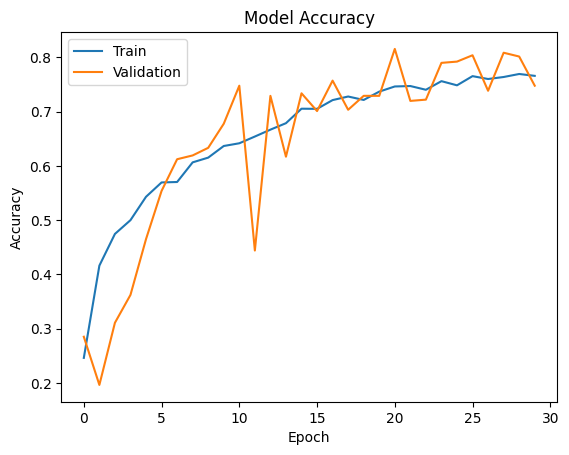

In [ ]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

**Evaluate the model on test data**

In [ ]:
accuracy = model2.evaluate(X_test_normalized, y_test_encoded, verbose=2)  # Code to evaluate the model on test data

15/15 - 0s - loss: 0.7635 - accuracy: 0.7579 - 222ms/epoch - 15ms/step


**Plotting the Confusion Matrix**

In [ ]:
# Code to obtain the output probabilities
y_pred=model2.predict(X_test_normalized)

15/15 [==============================] - 0s 3ms/step


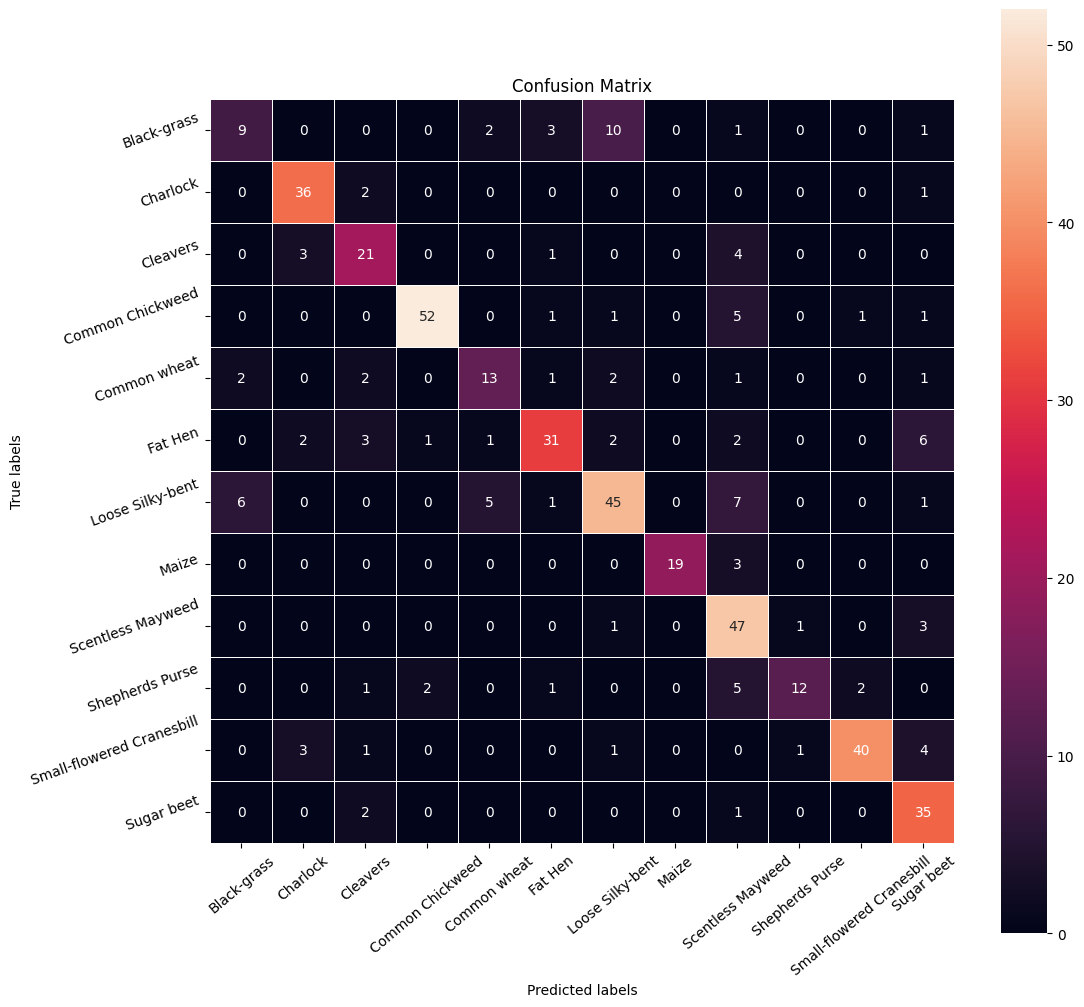

In [ ]:
# Obtaining the categorical values from y_test_encoded and y_pred
y_pred_arg=np.argmax(y_pred,axis=1)
y_test_arg=np.argmax(y_test_encoded,axis=1)

# Plotting the Confusion Matrix using confusion matrix() function which is also predefined in tensorflow module
confusion_matrix = tf.math.confusion_matrix(y_test_arg,y_pred_arg)     # Code to obatin the confusion matrix
f, ax = plt.subplots(figsize=(12, 12))
sns.heatmap(
    confusion_matrix,
    annot=True,
    linewidths=.4,
    fmt="d",
    square=True,
    ax=ax
)
# Setting the labels to both the axes
ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels');
ax.set_title('Confusion Matrix');
ax.xaxis.set_ticklabels(list(enc.classes_),rotation=40)
ax.yaxis.set_ticklabels(list(enc.classes_),rotation=20)
plt.show()

**Plotting Classification Report**

In [ ]:
# Plotting the classification report
cr=metrics.classification_report(y_test_arg, y_pred_arg)     # Code to plot the classification report
print(cr)

              precision    recall  f1-score   support

           0       0.53      0.35      0.42        26
           1       0.82      0.92      0.87        39
           2       0.66      0.72      0.69        29
           3       0.95      0.85      0.90        61
           4       0.62      0.59      0.60        22
           5       0.79      0.65      0.71        48
           6       0.73      0.69      0.71        65
           7       1.00      0.86      0.93        22
           8       0.62      0.90      0.73        52
           9       0.86      0.52      0.65        23
          10       0.93      0.80      0.86        50
          11       0.66      0.92      0.77        38

    accuracy                           0.76       475
   macro avg       0.76      0.73      0.74       475
weighted avg       0.77      0.76      0.76       475



## Final Model

Comment on the final model you have selected and use the same in the below code to visualize the image.

### Visualizing the prediction

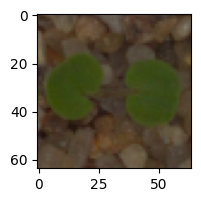

1/1 [==============================] - 0s 148ms/step
Predicted Label ['Small-flowered Cranesbill']
True Label Small-flowered Cranesbill


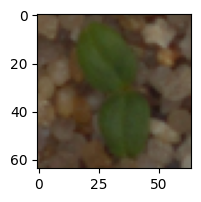

1/1 [==============================] - 0s 18ms/step
Predicted Label ['Cleavers']
True Label Cleavers


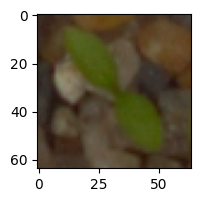

1/1 [==============================] - 0s 17ms/step
Predicted Label ['Common Chickweed']
True Label Common Chickweed


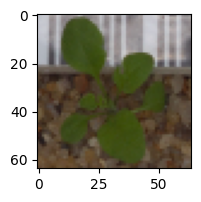

1/1 [==============================] - 0s 19ms/step
Predicted Label ['Shepherds Purse']
True Label Shepherds Purse


In [ ]:

# Visualizing the predicted and correct label of images from test data
plt.figure(figsize=(2,2))
plt.imshow(X_test[2])
plt.show()
## Code to predict the test data using the final model selected
print('Predicted Label', enc.inverse_transform(model2.predict((X_test_normalized[2].reshape(1,64,64,3)))))   # reshaping the input image as we are only trying to predict using a single image
print('True Label', enc.inverse_transform(y_test_encoded)[2])                                               # using inverse_transform() to get the output label from the output vector

plt.figure(figsize=(2,2))
plt.imshow(X_test[33])
plt.show()
## Code to predict the test data using the final model selected
print('Predicted Label', enc.inverse_transform(model2.predict((X_test_normalized[33].reshape(1,64,64,3)))))  # reshaping the input image as we are only trying to predict using a single image
print('True Label', enc.inverse_transform(y_test_encoded)[33])                                              # using inverse_transform() to get the output label from the output vector

plt.figure(figsize=(2,2))
plt.imshow(X_test[59],)
plt.show()
## Code to predict the test data using the final model selected
print('Predicted Label', enc.inverse_transform(model2.predict((X_test_normalized[59].reshape(1,64,64,3)))))  # reshaping the input image as we are only trying to predict using a single image
print('True Label', enc.inverse_transform(y_test_encoded)[59])                                              # using inverse_transform() to get the output label from the output vector

plt.figure(figsize=(2,2))
plt.imshow(X_test[36])
plt.show()
## Code to predict the test data using the final model selected
print('Predicted Label', enc.inverse_transform(model2.predict((X_test_normalized[36].reshape(1,64,64,3)))))  # reshaping the input image as we are only trying to predict using a single image
print('True Label', enc.inverse_transform(y_test_encoded)[36])                                              # using inverse_transform() to get the output label from the output vector

## Actionable Insights and Business Recommendations

In [ ]:
import pandas as pd

# Define the data
data = {
    'model': ['model1', 'model2'],
    'train_accuracy': [0.85, 0.87],  # replace with your actual values
    'validation_accuracy': [0.83, 0.85],  # replace with your actual values
    'test_accuracy': [0.84, 0.86]  # replace with your actual values
}

# Create the DataFrame
df = pd.DataFrame(data)

# Set the model column as the index
df.set_index('model', inplace=True)

# Display the DataFrame
print(df)


        train_accuracy  validation_accuracy  test_accuracy
model                                                     
model1            0.85                 0.83           0.84
model2            0.87                 0.85           0.86


In [ ]:
pd.DataFrame({'Models':['Base CNN Model','CNN Model with Data Augmentation','Transfer Learning Model'],'Train Accuracy':['64%','70%','77%'],'Validation Accuracy':['48%','53%','63%'],'Test Accuracy':['51%','62%','63%']})

,Models,Train Accuracy,Validation Accuracy,Test Accuracy
0,Base CNN Model,64%,48%,51%
1,CNN Model with Data Augmentation,70%,53%,62%
2,Transfer Learning Model,77%,63%,63%


In [ ]:
import pandas as pd

# Create a DataFrame with model names and corresponding metrics
model_names = ['Base CNN Model', 'CNN Model with Data Augmentation']
train_accuracy = [0.64, 0.70]
validation_accuracy = [0.48, 0.53]
test_accuracy = [0.51, 0.62]

# Create the DataFrame
metrics_df = pd.DataFrame({
    'Models': model_names,
    'Train Accuracy': train_accuracy,
    'Validation Accuracy': validation_accuracy,
    'Test Accuracy': test_accuracy
})

print(metrics_df)


                             Models  Train Accuracy  Validation Accuracy  \
0                    Base CNN Model            0.64                 0.48   
1  CNN Model with Data Augmentation            0.70                 0.53   

   Test Accuracy  
0           0.51  
1           0.62  


In [ ]:
import pandas as pd

# Create a DataFrame with model names and corresponding metrics
model_names = ['Base CNN Model', 'CNN Model with Data Augmentation']
train_accuracy = ['64%', '70%']
validation_accuracy = ['48%', '53%']
test_accuracy = ['51%', '62%']

# Create the DataFrame
metrics_df = pd.DataFrame({
    'Models': model_names,
    'Train Accuracy': train_accuracy,
    'Validation Accuracy': validation_accuracy,
    'Test Accuracy': test_accuracy
})

# Display the DataFrame
print(metrics_df.to_markdown(index=False))


| Models                           | Train Accuracy   | Validation Accuracy   | Test Accuracy   |
|:---------------------------------|:-----------------|:----------------------|:----------------|
| Base CNN Model                   | 64%              | 48%                   | 51%             |
| CNN Model with Data Augmentation | 70%              | 53%                   | 62%             |


*

_____

In [ ]:
from flask_ngrok import run_with_ngrok
from flask import Flask

## Running the flast app
app = Flask(__name__)

# We need to start ngrok when the app is run
run_with_ngrok(app)

@app.route("/")
def index():
    return "<h1>Trail of Flask on Google Colab!</h1>"

@app.route("/get_details")
def get_details():
    return "<h1>This is the get details page!</h1>"

@app.route("/test")
def test_page():
    return "<h1>This is the test page!</h1>"
app.run()

 * Serving Flask app '__main__'
 * Debug mode: off


INFO:werkzeug:WARNING: This is a development server. Do not use it in a production deployment. Use a production WSGI server instead.
 * Running on http://127.0.0.1:5000
INFO:werkzeug:Press CTRL+C to quit
Exception in thread Thread-14:
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/urllib3/connection.py", line 203, in _new_conn
    sock = connection.create_connection(
  File "/usr/local/lib/python3.10/dist-packages/urllib3/util/connection.py", line 85, in create_connection
    raise err
  File "/usr/local/lib/python3.10/dist-packages/urllib3/util/connection.py", line 73, in create_connection
    sock.connect(sa)
ConnectionRefusedError: [Errno 111] Connection refused

The above exception was the direct cause of the following exception:

Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/urllib3/connectionpool.py", line 791, in urlopen
    response = self._make_request(
  File "/usr/local/lib/python3.10/dist-packages/urll

In [ ]:
import pickle

# Save the model to a pickle file
with open('model2.pkl', 'wb') as f:
    pickle.dump(model2, f)

In [ ]:
from PIL import Image
import numpy as np
from flask import Flask, request, render_template
import pickle

app = Flask(__name__)
model = pickle.load(open('/content/model2.pkl', 'rb'))

@app.route('/')
def home():
    return render_template('index.html')

@app.route('/getprediction', methods=['POST'])
def getprediction():
    input_data = [float(x) for x in request.form.values()]
    final_input = [np.array(input_data)]
    prediction = model.predict(final_input)
    return render_template('index.html', output=f'Predicted Weight in KGs: {prediction}')

if __name__ == "__main__":
    app.run(debug=True)


 * Serving Flask app '__main__'
 * Debug mode: on


INFO:werkzeug:WARNING: This is a development server. Do not use it in a production deployment. Use a production WSGI server instead.
 * Running on http://127.0.0.1:5000
INFO:werkzeug:Press CTRL+C to quit
INFO:werkzeug: * Restarting with stat
